In [1]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from math import pi, acos
import matplotlib.pyplot as plt

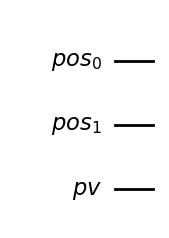

In [2]:
qr1=QuantumRegister(2,'pos')
qr=QuantumRegister(1,'pv')
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr1,qr)
qc.draw('mpl')

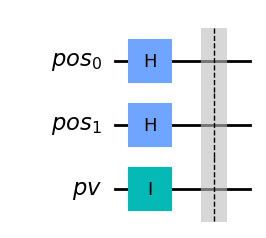

In [3]:
#Setting pixel position
qc.h(0)
qc.h(1)
qc.i(2)
qc.barrier()
qc.draw('mpl')

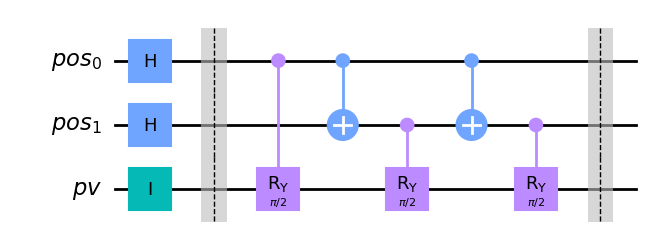

In [4]:
theta = pi/2
#pixel1
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.barrier()
qc.draw('mpl')

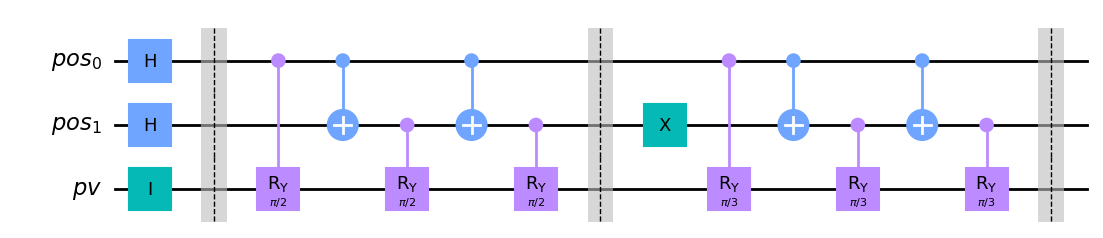

In [5]:
theta=pi/3
#pixel2
qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
qc.draw('mpl')

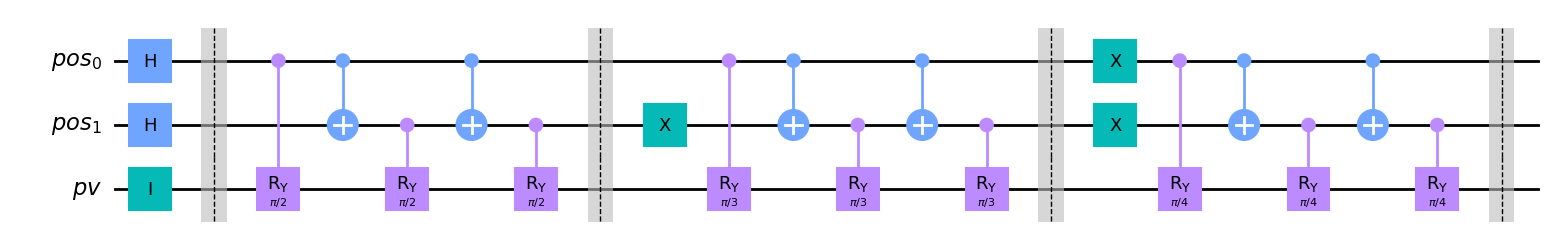

In [6]:
theta=pi/4
#pixel3
qc.x(0)
qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
qc.draw('mpl')

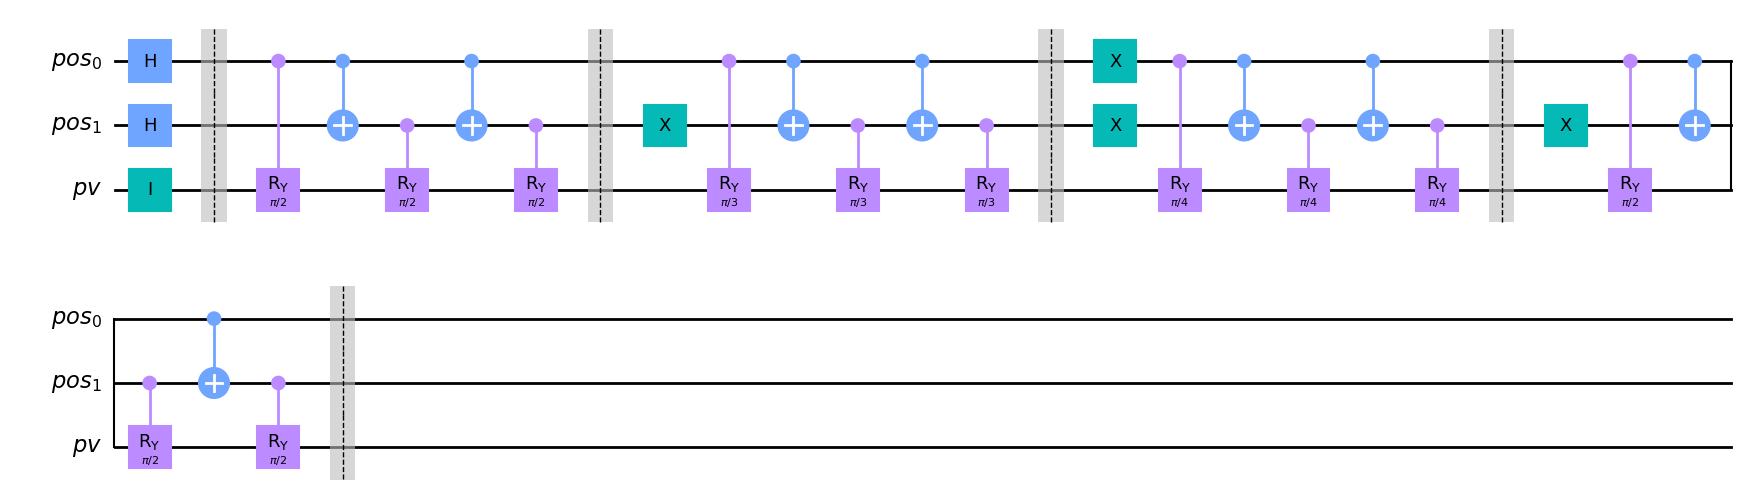

In [7]:
theta=pi/2
#pixel4
qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.barrier()
qc.draw('mpl')

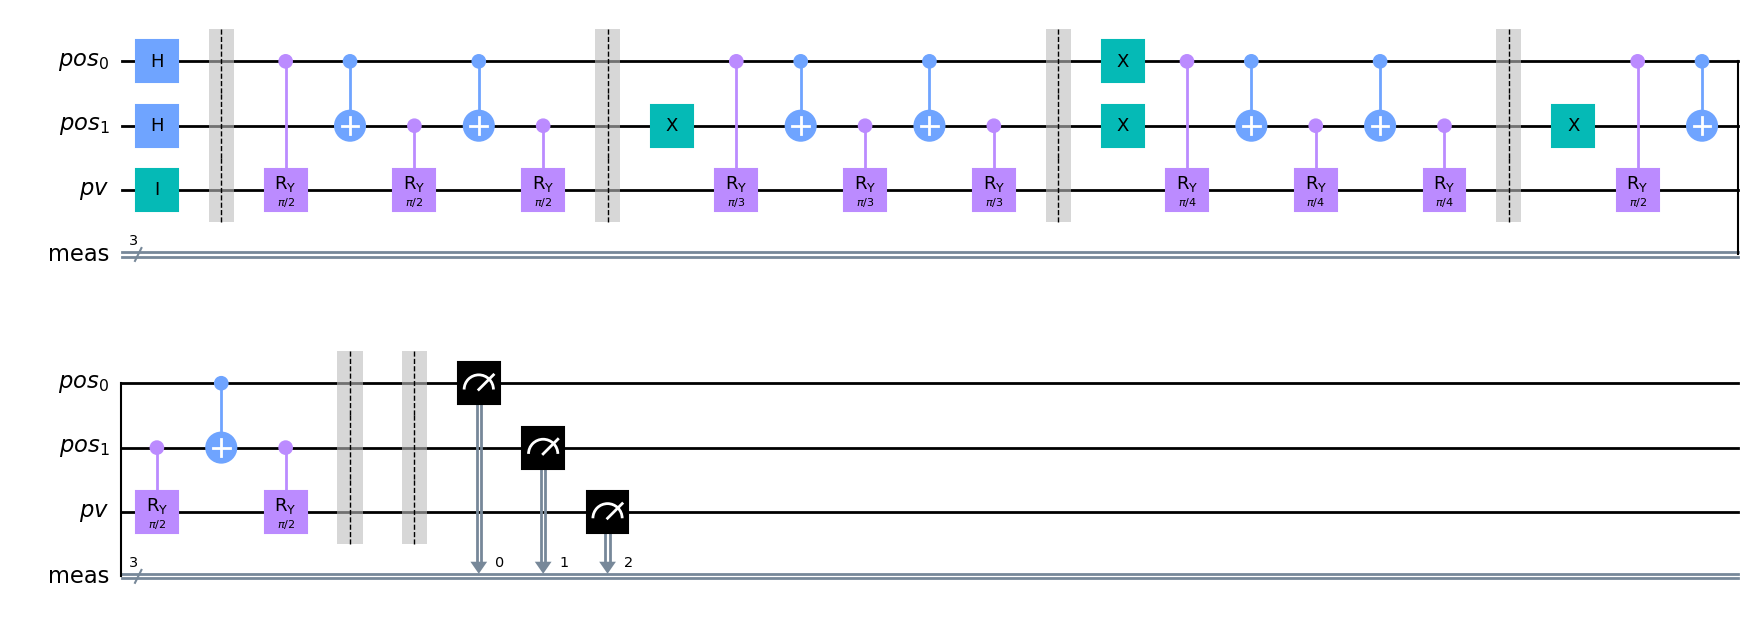

In [8]:
qc.measure_all()
qc.draw('mpl')

{'100': 136, '110': 1669, '111': 133, '011': 2108, '000': 2114, '010': 550, '001': 1111, '101': 1091}


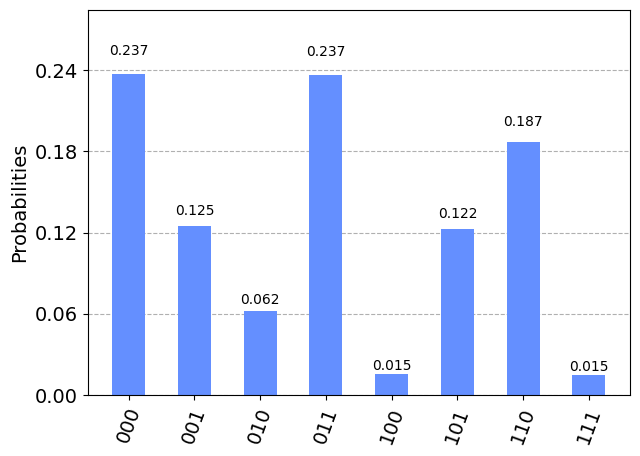

In [9]:
aer_sim=Aer.get_backend('aer_simulator')
t_qc=transpile(qc,aer_sim)
job=aer_sim.run(t_qc,shots=8912)
result=job.result()
counts=result.get_counts()
print(counts)
plot_histogram(counts)

In [10]:
def decoder(n):
    pvalue = []
    n_rows = (n+1)/2
    n_columns = (n+1)/2
    for pixel in range(n+1):
        # convert to pixel number to bit strings, i.e. (00, 01 etc.)
        bit_str = f"{pixel:02b}"

        # Count no. of times we measure pixel string with intensity
        # bit == 1, and intensity bit == 0 respectively (if the string
        # doesn't exist in the dict, we default to 0).
        n_ones = counts.get('1'+bit_str, 0)
        n_zeros = counts.get('0'+bit_str, 0)

        # then pixel intensity ~= fraction of 1s
        pixel_value = n_ones / (n_ones + n_zeros)
        pvalue.append(pixel_value)
        print(f"Pixel {bit_str} has intensity ~= {pixel_value}")
    p = np.array(pvalue)
    img_matrix = p.reshape(int(len(p)/2),int(len(p)/2))
    print(img_matrix)
    plt.imshow(img_matrix)  
 

Pixel 00 has intensity ~= 0.060444444444444446
Pixel 01 has intensity ~= 0.49545867393278836
Pixel 10 has intensity ~= 0.7521406038756197
Pixel 11 has intensity ~= 0.05934850513163766
[[0.06044444 0.49545867]
 [0.7521406  0.05934851]]


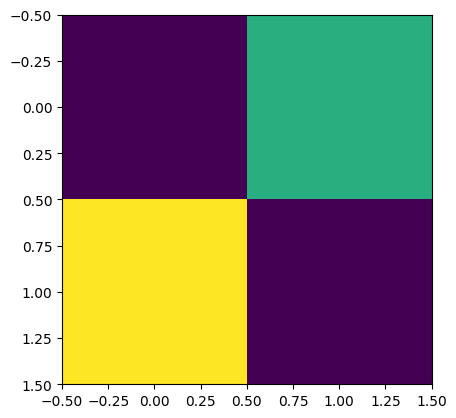

In [11]:
decoder(3)

In [12]:
#Circuitanalysis
print('Circuit dimensions')
print('Circuit depth: ',qc.decompose().depth())
print('Circuit size: ',qc.decompose().size())
qc.decompose().count_ops()

Circuit dimensions
Circuit depth:  50
Circuit size:  66


OrderedDict([('cx', 32),
             ('ry', 24),
             ('barrier', 6),
             ('u3', 4),
             ('measure', 3),
             ('u2', 2),
             ('id', 1)])

In [13]:
def probs(count,num_shots):
    prob = {}
    
    char = ['0','1']
    for c in char:
        for d in char:
            for e in char:
                state = c+d+e
                if (state in count):
                    prob[state] = count[state]/num_shots
                else:
                    prob[state] = 0
                    
    angles = []
    for c in char:
        for d in char:
            zero = '0'+c+d
            one = '1'+c+d
            one_prob = prob[one]/(prob[zero]+prob[one])
            
            angles.append(asin(np.sqrt(one_prob)))
    return angles

In [14]:
angles = probs(counts,8912)
print(angles)

NameError: name 'asin' is not defined

In [15]:
im = []
for i in range(len(angles)):
    y = -162.338042*angles[i] + 255
    im.append(y)
print(im)

NameError: name 'angles' is not defined